In [ ]:
!python --version

In [1]:
!python -m pip install --upgrade pip
!python -m pip install --upgrade Pillow
!python -m pip install shapely

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\python310\\lib\\site-packages\\pip-21.2.4.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 21.2.4 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 21.2.4 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 21.2.4 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install wheel


[notice] A new release of pip available: 21.2.4 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [246]:
from PIL import Image, ImageOps, ImageDraw
from random import randrange, uniform, random
from IPython.display import display
from shapely import Polygon, Point, LineString, GeometryCollection

In [2]:
def loadImages(prefix, count):
    images = []
    for i in range(1, count):
        images.append(Image.open(prefix + '{:0>3}'.format(i) + '.png'))
    return images

In [3]:
def getAverageSize(images):
    width = int(sum([im.width for im in images])/len(images))
    height = int(sum([im.height for im in images])/len(images))
    return (width, height)

In [4]:
def createTree(images, width, height, symmetric=False, max_rotation=50,
               horizontal_packing=0.5, vertical_offset=0.05, vertical_packing=0.25, min_scaling=0.5):
    im = Image.new('RGBA', (width, height), (0,0,0,0))
    avgWidth, avgHeight = getAverageSize(images)
    
    lastLine = height - 2 * avgHeight
    
    y = lastLine
    offset = 0
    while y > 0:
        x = offset
        while x + avgWidth < width:
            delta = randrange(int(avgWidth * horizontal_packing))

            leaf = images[randrange(len(images))]
            #if x + delta + leaf.width > width:
            #    next
            scale = uniform(min_scaling, 1.0)
            leaf = leaf.resize((int(leaf.width * scale), int(leaf.height * scale)))
            leaf = leaf.rotate(-randrange(max_rotation), expand=1)
            im.paste(leaf, (x, y + randrange(50) - 25), leaf)
            delta = randrange(int(avgWidth / horizontal_packing))
            leaf = images[randrange(len(images))]
            if x + delta + leaf.width > width:
               next
            scale = uniform(min_scaling, 1.0)
            leaf = leaf.resize((int(leaf.width * scale), int(leaf.height * scale)))
            leaf = leaf.rotate(randrange(max_rotation), expand=1)
            im.paste(leaf, (x, y + avgHeight + randrange(25) - 12), leaf)


            x = x + delta
        y -= int(vertical_packing * avgHeight)
        offset += int(avgWidth * vertical_offset)
    return im

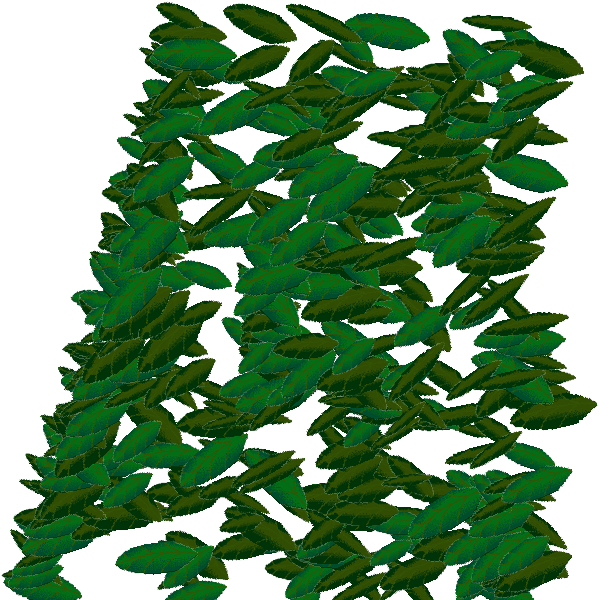

In [5]:
im = createTree(loadImages('leaf-b-', 4), 600, 600, False, vertical_packing=0.5)
display(im)

In [76]:


def createTree2(images, width, height, 
               area,
               min_rotation=-30, max_rotation=30,
               quantity=50,min_scaling=0.5, flip=False, shadow=False, add_depth=True):
    im = Image.new('RGBA', (width, height), (0,0,0,0))
    count = 0
    while count < quantity:
        x = randrange(0, width)
        y = randrange(0, height)
        
        
        def darken(x):
            if x == 255:
                return 255
            else:
                d =  max(count, 50) / quantity
                return int(x * d * d)
        
        leaf = images[randrange(len(images))]
        scale = uniform(min_scaling, 1.0)
        leaf = leaf.resize((int(leaf.width * scale), int(leaf.height * scale)))
        if flip and uniform(0, 1) > 0.5:
            leaf = ImageOps.mirror(leaf)
        leaf = leaf.rotate(randrange(min_rotation, max_rotation), expand=1)
        
        box = Polygon(((x, y), (x + leaf.width, y), (x + leaf.width, y + leaf.height),
                       (x, y + leaf.height)))
        
        if area.contains(box):
            if add_depth:
                leaf = Image.eval(leaf, darken)
            count += 1
            if shadow:
                shadow_image = Image.new('RGBA', (leaf.width, leaf.height), (0,0,0,100))
                #im.paste(shadow_image, (x - 2, y + 2), leaf)
                
                shadow_to_compose = Image.new('RGBA', (leaf.width, leaf.height), (0,0,0,0))
                shadow_to_compose.paste(shadow_image, (0, 0), leaf)
                im.alpha_composite(shadow_to_compose, (max(x - 2, 0), y + 2))
            im.paste(leaf, (x, y), leaf)
    return im

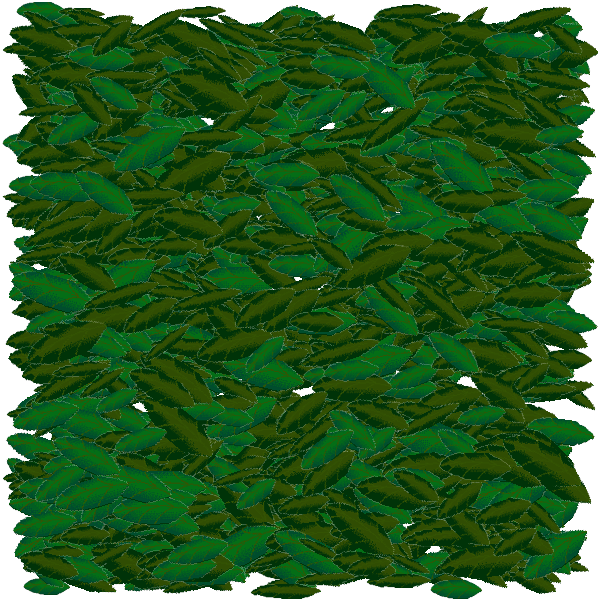

In [77]:
im = createTree2(loadImages('leaf-b-', 4), 600, 600, Polygon(((0, 0), (600, 0), (600,600), (0, 600))),
                 min_rotation=-45, max_rotation=45, quantity=1500, flip=False, shadow=False, add_depth=False)
display(im)

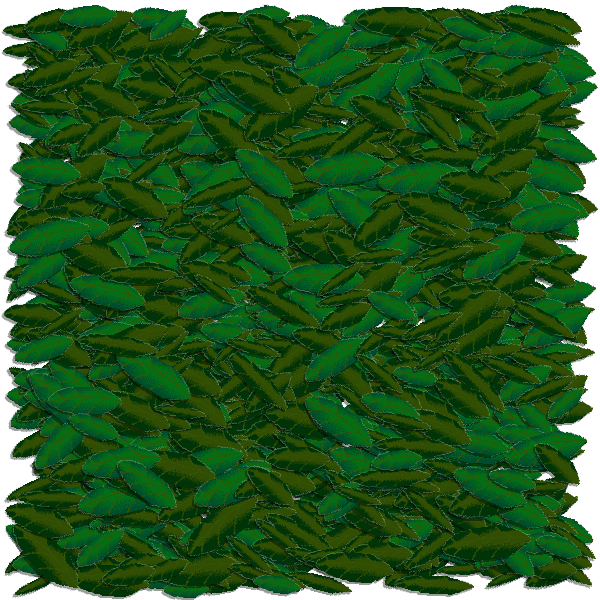

In [78]:
im = createTree2(loadImages('leaf-b-', 4), 600, 600, Polygon(((0, 0), (600, 0), (600,600), (0, 600))),
                 min_rotation=-45, max_rotation=45, quantity=1500, flip=False, shadow=True, add_depth=False)
display(im)

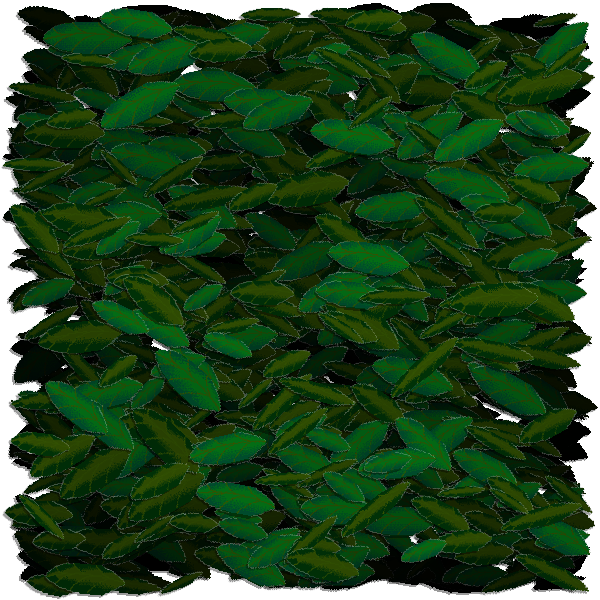

In [79]:
im = createTree2(loadImages('leaf-b-', 4), 600, 600, Polygon(((0, 0), (600, 0), (600,600), (0, 600))),
                 min_rotation=-45, max_rotation=45, quantity=1500, flip=False, shadow=True, add_depth=True)
display(im)

In [8]:
import math
def createCircle(x0, y0, xRadius, yRadius, steps):
    points = []
    t = 0
    delta = 6.28318530718 / steps
    while t < 6.28318530718:
        point = (xRadius * math.cos(t) + x0, yRadius * math.sin(t) + y0)
        points.append(point)
        t += delta
    return Polygon(points)
    
def createBox(width, height):
    return Polygon(((0, 0), (width, 0), (width, height), (0, height)))
        

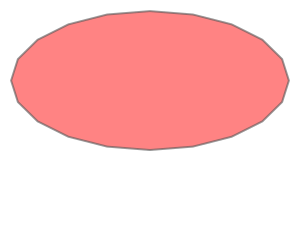

In [9]:
createCircle(0, 0, 200, 100, 20)

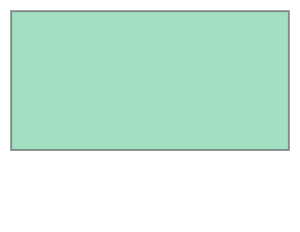

In [10]:
createBox(400, 200)

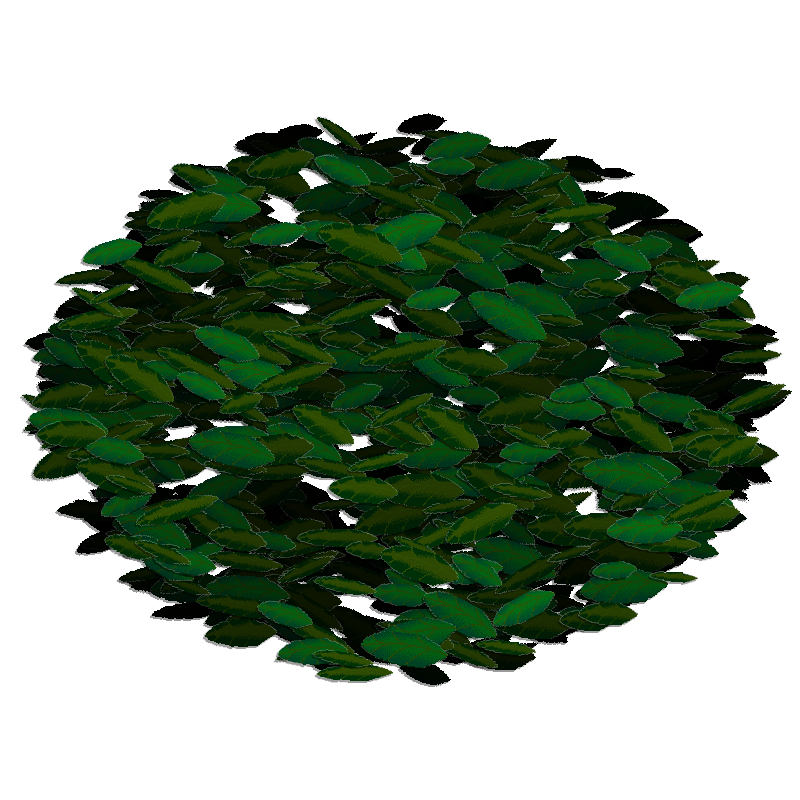

In [81]:
im = createTree2(loadImages('leaf-b-', 4), 800, 800, createCircle(400, 400, 400, 300, 20),
                 min_rotation=-35, max_rotation=30, quantity=1000, flip=False, shadow=True)
display(im)

In [96]:
def createTree3(images, width, height, 
               area,
               leaves_per_bunch=5, distance_to_center=45,
               quantity=50, min_scaling=0.5, shadow=False, half_circle=False,  add_depth=True, phase=0):
    im = Image.new('RGBA', (width, height), (0,0,0,0))
    draw = ImageDraw.Draw(im)
    count = 0
    while count < quantity:
        x = randrange(0, width)
        y = randrange(0, height)        
        point = Point(x, y)
        
        if area.contains(point):
            def darken(v):
                if v > 200:
                    return 255
                else:
                    d = count / quantity
                    return int(v * d * d)
            n = int(randrange(leaves_per_bunch - 1, leaves_per_bunch + 2))
            m = int(n/2) if half_circle else n 
            for i in range(phase, phase + m):
                leaf = images[randrange(len(images))]
                scale = uniform(min_scaling, 1.0)
                leaf = leaf.resize((int(leaf.width * scale), int(leaf.height * scale)))
                
                angle = i * 6.28 / n
                angleDegrees = i * 360 / n
                r = distance_to_center
                
                leaf = leaf.rotate(-angleDegrees + 180, expand=1)
                
                newX = r * math.cos(angle) + x
                newY = r * math.sin(angle) + y
                
                w = leaf.width
                h = leaf.height
                
                if add_depth:
                    leaf = Image.eval(leaf, darken)
                draw.line([int(x), int(y), int(newX), int(newY)], fill=(50, 50, 0, 255))
                
                
                if shadow:
                    shadow_image = Image.new('RGBA', (leaf.width, leaf.height), (0,0,0,100))
                    shadow_to_compose = Image.new('RGBA', (leaf.width, leaf.height), (0,0,0,0))
                    shadow_to_compose.paste(shadow_image, (0, 0), leaf)
                    im.alpha_composite(shadow_to_compose, (max(int(newX - w/2) - 2, 0), max(int(newY - h/2) + 2, 0)))
                
                im.paste(leaf, (max(int(newX - w/2), 0), max(int(newY - h/2), 0)), leaf)
            count += 1
    return im

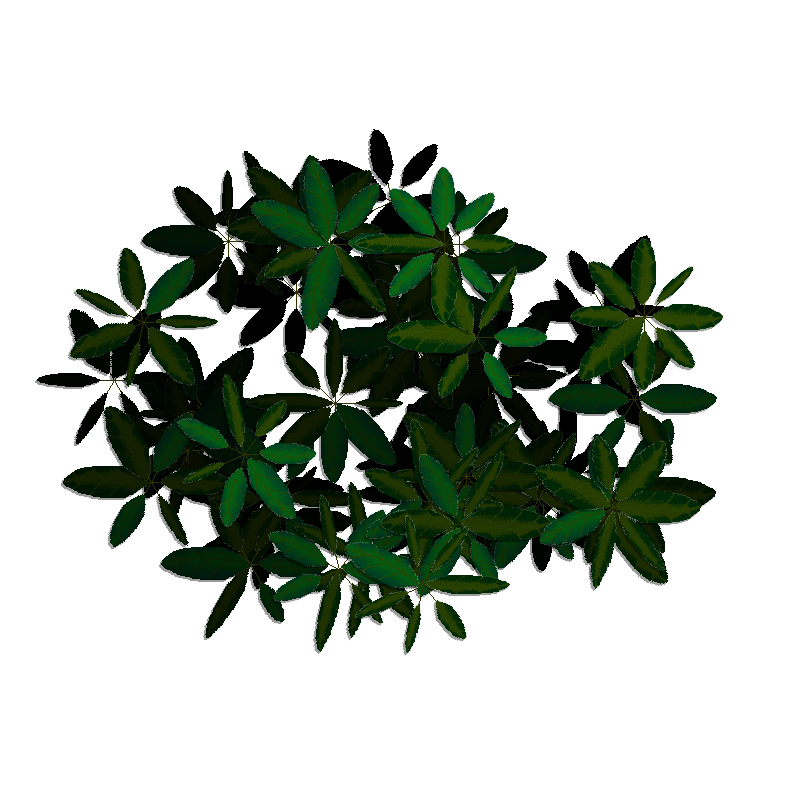

In [97]:
im = createTree3(loadImages('leaf-b-', 4), 800, 800, createCircle(400, 400, 300, 200, 20),
                 leaves_per_bunch=7, distance_to_center=45, quantity=50, shadow=True)
im.save("tree1.png")
display(im)


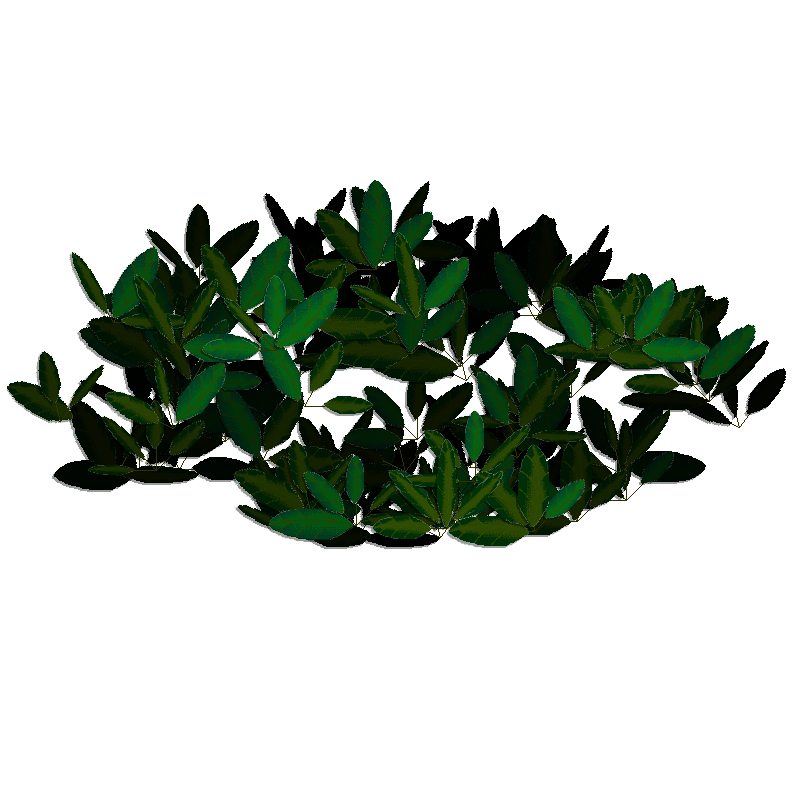

In [98]:
im = createTree3(loadImages('leaf-b-', 4), 800, 800, createCircle(400, 400, 350, 150, 20),
                 leaves_per_bunch=7, distance_to_center=45, quantity=90, shadow=True, half_circle=True, phase=4)
display(im)

In [249]:
import numpy as np

def add_branch(x0, y0, x1, y1, steps, p, w):
    print(p)
    if steps > 2 and random() < p:
        return createBranch(x0, y0, x1 + randrange(-100, 100), y1 + randrange(-100, 100), steps, w)
    else:
        return None

def createBranch(x0, y0, x1, y1, steps, w=45):
#     print("*************** Create Branch ***************")
    points = [(x0, y0)]
    
    current = (x0, y0)
    
    lines = []
    
    for i in range(1, steps):
#         print("current:")
#         print(current)
        x = (x1 - current[0]) * .25 + current[0]
        y = (y1 - current[1]) * .25 + current[1]
#         print((x, y))
        
        topY = int((steps - i) / float(steps) * 45)
        topX = int((steps - i) / float(steps) * 45)      
        
#         print("tops")
#         print(topX)
#         print(topY)
        
        if topY < 1 or topX < 1:
            break

        x += randrange(0, topX)
        y += randrange(-topY, topY)

#         print("new X,Y")
#         print((x, y))
        
        if (x1 > x0 and x > x1) or (x1 < x0 and x < x1): 
            x = x1

        if (y1 > y0 and y > y1) or (y1 < y0 and y < y1):
            y1 = y
        
        other_line = add_branch(x, y, x1, y1, steps - i, 1 - float(i) / steps, w)
        if other_line:
            lines.append(other_line)
        
        points.append((x, y))
        current = (x, y)
    
    #points.append((x1, y1))
    
    lines.append(LineString(points))
    
    return GeometryCollection(lines)
    

0.9
0.8888888888888888
0.875
0.8571428571428572
0.7142857142857143
0.8
0.75
0.6666666666666667
0.33333333333333337
0.5
0.25
0.6
0.4
0.19999999999999996
0.5714285714285714
0.4285714285714286
0.2857142857142857
0.1428571428571429
0.75
0.8333333333333334
0.8
0.75
0.6666666666666667
0.33333333333333337
0.5
0.25
0.6
0.6666666666666667
0.33333333333333337
0.4
0.19999999999999996
0.6666666666666667
0.75
0.5
0.25
0.5
0.33333333333333337
0.16666666666666663
0.625
0.8
0.75
0.6666666666666667
0.33333333333333337
0.5
0.25
0.6
0.6666666666666667
0.33333333333333337
0.4
0.19999999999999996
0.5
0.75
0.5
0.25
0.375
0.25
0.125
0.7777777777777778
0.8571428571428572
0.8333333333333334
0.8
0.6
0.6666666666666667
0.33333333333333337
0.4
0.19999999999999996
0.6666666666666667
0.5
0.33333333333333337
0.16666666666666663
0.7142857142857143
0.5714285714285714
0.75
0.5
0.25
0.4285714285714286
0.6666666666666667
0.33333333333333337
0.2857142857142857
0.1428571428571429
0.6666666666666667
0.8333333333333334
0.666

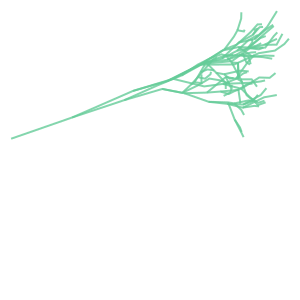

In [250]:
createBranch(10, 10, 800, 300, 10, w=100)